In [1]:
import Pkg

In [2]:
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`


In [3]:
Pkg.add("LinearAlgebra")

   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`


## график целевой функции:

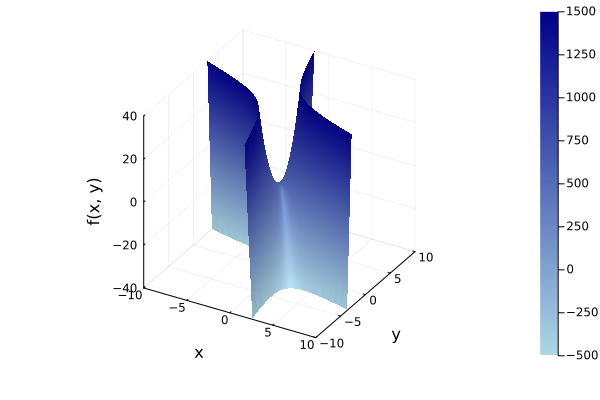

In [4]:
using Plots
xs = range(-10, stop=10, length=100)
ys = range(-10, stop=10, length=100)
f(x,y) = 2*x^2 + 10*x*y + 3*y^2
zs = [f(xi, yi) for xi in xs, yi in ys]

surface(xs, ys, zs, xlabel="x", ylabel="y", zlabel="f(x, y)", color=:blues, alpha=1, label="f(x, y)", zlims = (-40,40))  

## график множества условия связи:

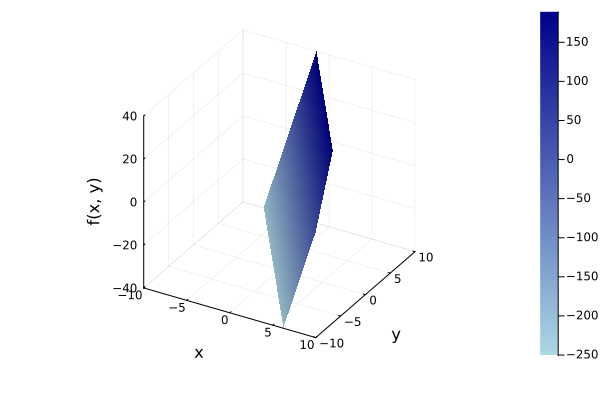

In [5]:
using Plots
xs = range(-10, stop=10, length=100)
ys = range(-10, stop=10, length=100)
g(x,y) = 9x + 13y - 31
gzs = [g(xi, yi) for xi in xs, yi in ys]
trace2 = surface(xs, ys, gzs, xlabel="x", ylabel="y", zlabel="f(x, y)", color=:blues, alpha=1, label="f(x, y)", zlims = (-40,40))
trace2

## график пересечения целевой функции и множества условия связи:

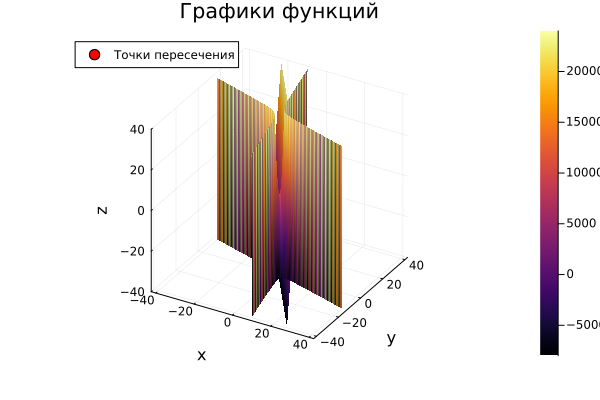

In [6]:
using Plots

# Определение функций
f(x, y) = 2*x^2 + 10*x*y + 3*y^2
g(x, y) = 9x + 13y - 31

# Создание сетки точек
x = range(-40, stop = 40, length = 100)
y = range(-40, stop = 40, length = 100)
z = [f(i, j) - g(i, j) for i in x, j in y]
zs = [f(i, j) for i in x, j in y]
gzs = [g(i, j) for i in x, j in y]
# Нахождение точек пересечения
intersection_points = []
for i in 1:length(x)
    for j in 1:length(y)
        if abs(z[i, j]) < 1e-8
            push!(intersection_points, (x[i], y[j], g(x[i],y[i])))
        end
    end
end

# Отрисовка графиков и точек пересечения
surface(x, y, gzs, xlabel = "x", ylabel = "y", zlabel = "z", zlims = (-40,40), title = "Графики функций")
surface!(x, y, zs, xlabel = "x", ylabel = "y", zlabel = "z", zlims = (-40,40), title = "Графики функций")
scatter3d!([point[1] for point in intersection_points], [point[2] for point in intersection_points], [point[3] for _ in intersection_points], color = :red, marker = :circle, label = "Точки пересечения")


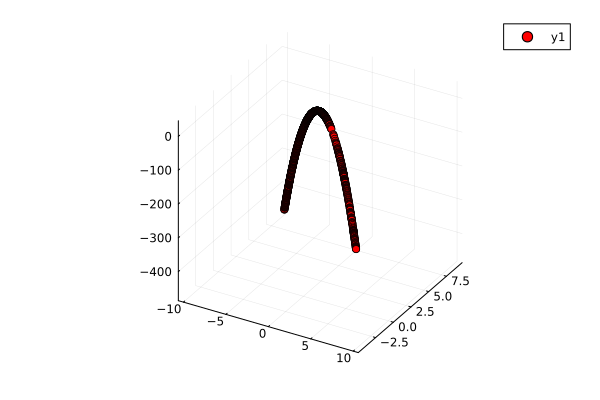

In [7]:
phi(x) = (31 - 9*x)/13
function intersection_line()
    intersection_points = []

    for x in -10:0.001:10
      for y in -10:0.001:10
        if  phi(x) == y
            push!(intersection_points, [x, y, f(x, y)])
        end
      end
    end

    return intersection_points
end

intersection_points = intersection_line()
x = [point[1] for point in intersection_points]
y = [point[2] for point in intersection_points]
z = [point[3] for point in intersection_points]

scatter3d(x,y,z, color = :red)

## Безусловный экстремум

In [8]:
# Определение функции
f(x, y) = 2x^2 + 10x*y + 3y^2


function first_derivative_x(f, x, y)
    h = 1e-6
    return (f(x + h, y) - f(x, y)) / h
end


function first_derivative_y(f, x, y)
    h = 1e-6
    return (f(x, y + h) - f(x, y)) / h
end


function second_derivative_x(f, x, y)
    h = 1e-6
    return (f(x + h, y) - 2*f(x, y) + f(x - h, y)) / (h^2)
end


function second_derivative_y(f, x, y)
    h = 1e-6
    return (f(x, y + h) - 2*f(x, y) + f(x, y - h)) / (h^2)
end

function mixed_derivative(f, x, y)
    h = 1e-6
    return (f(x + h, y + h) - f(x + h, y) - f(x, y + h) + f(x, y)) / (h^2)
end

# Пример использования
x = 2.0
y = 1.0
println("Значение первой производной по x в точке (x = $x, y = $y): ", first_derivative_x(f, x, y))
println("Значение первой производной по y в точке (x = $x, y = $y): ", first_derivative_y(f, x, y))
println("Значение второй производной по x в точке (x = $x, y = $y): ", second_derivative_x(f, x, y))
println("Значение второй производной по y в точке (x = $x, y = $y): ", second_derivative_y(f, x, y))
println("Значение смешанной производной по x и y в точке (x = $x, y = $y): ", mixed_derivative(f, x, y))

Значение первой производной по x в точке (x = 2.0, y = 1.0): 18.00000200447016
Значение первой производной по y в точке (x = 2.0, y = 1.0): 26.000003000348215
Значение второй производной по x в точке (x = 2.0, y = 1.0): 4.0039083160081645
Значение второй производной по y в точке (x = 2.0, y = 1.0): 6.000533403494046
Значение смешанной производной по x и y в точке (x = 2.0, y = 1.0): 9.99733629214461


In [9]:
Pkg.add("SymPy")

   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`


In [10]:
using SymPy

# Объявление переменных
x, y = symbols("x y")

# Определение функции
h = 2x^2 + 10x*y + 3y^2

# Вычисление частных производных
df_dx = diff(h, x)
df_dy = diff(h, y)
df_dxdx = diff(diff(h, x), x)
df_dydy = diff(diff(h, y), y)
df_dxdy = diff(diff(h, x), y)

# Вывод результатов
println("Первая производная по x: ", df_dx)
println("Первая производная по y: ", df_dy)
println("Вторая производная по x: ", df_dxdx)
println("Вторая производная по y: ", df_dydy)
println("Смешанная производная по x по y: ", df_dxdy)

Первая производная по x: 4*x + 10*y
Первая производная по y: 10*x + 6*y
Вторая производная по x: 4
Вторая производная по y: 6
Смешанная производная по x по y: 10


In [11]:
hessian = [[df_dxdx, df_dxdy]  [df_dxdy, df_dydy]]
hessian

2×2 Matrix{Sym{PyCall.PyObject}}:
  4  10
 10   6

In [12]:
# Подстановка значений стационарной точки x=0 y=0 (ее нашли аналитически)
extr_points = []
push!(extr_points, [0, 0])
df_dxdx_point = df_dxdx.subs([(x, 0), (y, 0)])
df_dxdy_point = df_dxdy.subs([(x, 0), (y, 0)])
df_dydy_point = df_dydy.subs([(x, 0), (y, 0)])


hessian_point = [df_dxdx_point df_dxdy_point;
     df_dxdy_point df_dydy_point]

2×2 Matrix{Sym{PyCall.PyObject}}:
  4  10
 10   6

In [13]:
using LinearAlgebra
det(hessian_point)

-76

In [21]:
using LinearAlgebra
function sylvester_criterion(matrix)
    n = size(matrix, 1)
    for i in 1:n
        submatrix = matrix[1:i, 1:i]
        if det(submatrix) <= 0
            return false
        end
    end
    return true
end

if sylvester_criterion(hessian_point)
    println("Матрица положительно определенная")
else
    println("матрица не является положительно определенной")
end

матрица не является положительно определенной


In [19]:
# главныe миноры матрицы Гессе
D1 = df_dxdx
D2 = det(hessian_point)

#Критерий Сильвестра
if D1 > 0 && D2 > 0
    println("Точка является точкой локального минимума.")
elseif D1 < 0 || D2 < 0
    println("Точка не является точкой локального экстремума. Седловая точка")
end

Точка не является точкой локального экстремума. Седловая точка


## Условный экстремум

In [25]:
function gauss(A, b)
    n = length(b)
    for k in 1:n-1
        for i in k+1:n
            for j in k+1:n
                A[i,j] -= (A[i,k] / A[k,k]) * A[k,j]
            end
            b[i] -= (A[i,k] / A[k,k]) * b[k]
        end
    end

    #
    x = similar(b, size(b))
    x[n] = b[n] / A[n,n]

    for i in n-1:-1:1
        x[i] = b[i]
        for j in i+1:n
            x[i] -= A[i,j] * x[j]
        end
        x[i] /= A[i,i]
    end

    return x
end


L(x,y,lam) = 2*x^2 + 10*x*y + 3*y^2 + lam*(9*x+13*x-31)
A = [4.0 10.0 9.0;10.0 6.0 13.0;9.0 13.0 0.0]
b = [0.0 0.0 31.0]
res = gauss(A, b)
res

1×3 Matrix{Float64}:
 2.0  1.0  -2.0

In [29]:
using SymPy

x, y = symbols("x y")
ph = 9*x + 13*y - 31

# Вычисление частных производных
dphi_dx = diff(ph, x)
dphi_dy = diff(ph, y)


function dL_dx( x, y,l, i)
    return (L(x + i, y, l) - L(x - i, y, l)) / (2i)
end

function dL_dy(x, y,l, i)
    return (L(x, y + i,l) - L(x, y - i, l)) / (2i)
end

function d2L_dx2(x, y,l, i)
    return (L(x + i, y,l) - 2*L(x, y,l) + L(x - i, y,l)) / (i^2)
end
function d2L_dxdy(x, y, l, i)
    return (L(x + i, y+i,l) - L(x+i, y-i,l) - L(x - i, y+i,l) + L(x-i, y-i, l)) / (4*i^2)
end

function d2L_dy2(x, y, l,i)
    return (L(x, y + i,l) - 2*L(x, y,l) + L(x, y - i,l)) / (i^2)
end

phi_dx = dphi_dx.subs([(x, res[1]), (y, res[2])])
phi_dy = dphi_dy.subs([(x, res[1]), (y, res[2])])
Lxx = d2L_dx2(res[1], res[2], res[3], 0.001)
Lxy = d2L_dxdy(res[1], res[2], res[3], 0.001)
Lyy = d2L_dy2(res[1], res[2], res[3], 0.001)

x_st = res[1]
y_st = res[2]
d = -1((-1)*phi_dx*(phi_dx*Lyy - Lxy*phi_dy) + phi_dy*(phi_dx*Lxy - Lxx*phi_dy))
if(d < 0)
  print("Условный максимум ($x_st $y_st)")
elseif(d > 0)
  print("условный минимум ($x_st $y_st)")
else
  print("Не является экстримумом")
end

Условный максимум (2.0 1.0)

In [30]:
phi_dx

9

In [31]:
phi_dy


13

In [32]:
Lxx

3.999999997006398

In [33]:
Lxy

9.999999999621423

In [34]:
Lyy

5.999999995509597